In [1]:
#!pip install tensorflow

In [2]:
import keras
from keras.preprocessing import image as image_utils
from keras.models import Sequential

In [3]:
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.2 MB/s eta 0:00:00


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
dir_sp_train = '/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/spiral/training'
dir_sp_test = '/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/spiral/testing'
dir_wv_train = '/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/wave/training'
dir_wv_test = '/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/wave/testing'

In [9]:
Name=[]
for file in os.listdir(dir_sp_train):
    Name+=[file]
print(Name)
print(len(Name))

['parkinson', 'healthy']
2


In [10]:
N=[]
for i in range(len(Name)):
    N+=[i]

normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

def mapper(value):
    return reverse_mapping[value]

In [11]:
dataset_sp=[]
count=0
for file in os.listdir(dir_sp_train):
    path=os.path.join(dir_sp_train,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        dataset_sp.append([image,count])
    count=count+1

testset_sp=[]
count=0
for file in os.listdir(dir_sp_test):
    path=os.path.join(dir_sp_test,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        testset_sp.append([image,count])
    count=count+1

In [12]:
dataset_wv=[]
count=0
for file in os.listdir(dir_wv_train):
    path=os.path.join(dir_wv_train,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        dataset_wv.append([image,count])
    count=count+1

testset_wv=[]
count=0
for file in os.listdir(dir_wv_test):
    path=os.path.join(dir_wv_test,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        testset_wv.append([image,count])
    count=count+1

In [13]:
data_sp,labels_sp0=zip(*dataset_sp)
test_sp,tlabels_sp0=zip(*testset_sp)

data_wv,labels_wv0=zip(*dataset_wv)
test_wv,tlabels_wv0=zip(*testset_wv)

In [14]:
labels_sp1=to_categorical(labels_sp0)
data_sp=np.array(data_sp)
labels_sp=np.array(labels_sp1)

tlabels_sp1=to_categorical(tlabels_sp0)
test_sp=np.array(test_sp)
tlabels_sp=np.array(tlabels_sp1)

In [15]:
labels_wv1=to_categorical(labels_wv0)
data_wv=np.array(data_wv)
labels_wv=np.array(labels_wv1)

tlabels_wv1=to_categorical(tlabels_wv0)
test_wv=np.array(test_wv)
tlabels_wv=np.array(tlabels_wv1)

In [16]:
trainx_sp,testx_sp,trainy_sp,testy_sp=train_test_split(data_sp,labels_sp,test_size=0.2,random_state=44)
trainx_wv,testx_wv,trainy_wv,testy_wv=train_test_split(data_wv,labels_wv,test_size=0.2,random_state=44)

In [17]:
print(trainx_sp.shape)
print(testx_sp.shape)
print(trainy_sp.shape)
print(testy_sp.shape)

(57, 100, 100, 3)
(15, 100, 100, 3)
(57, 2)
(15, 2)


In [18]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [19]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

pretrained_model4 = tf.keras.applications.DenseNet201(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model4.trainable = False

74836368/74836368 [==============================] - 0s 0us/step


In [20]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(2, activation='softmax')(x3)
model3 = tf.keras.Model(inputs=inputs3, outputs=outputs3)

inputs4 = pretrained_model4.input
x4 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model4.output)
outputs4 = tf.keras.layers.Dense(2, activation='softmax')(x4)
model4 = tf.keras.Model(inputs=inputs4, outputs=outputs4)

In [21]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
his3=model3.fit(datagen.flow(trainx_sp,trainy_sp,batch_size=32),validation_data=(testx_sp,testy_sp),epochs=60)
his4=model4.fit(datagen.flow(trainx_wv,trainy_wv,batch_size=32),validation_data=(testx_wv,testy_wv),epochs=60)

Epoch 1/60
2/2 [==============================] - 26s 9s/step - loss: 0.6061 - accuracy: 0.6140 - val_loss: 1.4782 - val_accuracy: 0.4000
Epoch 2/60
2/2 [==============================] - 3s 2s/step - loss: 0.6978 - accuracy: 0.6667 - val_loss: 0.5740 - val_accuracy: 0.7333
Epoch 3/60
2/2 [==============================] - 4s 2s/step - loss: 0.7195 - accuracy: 0.6491 - val_loss: 0.5084 - val_accuracy: 0.8000
Epoch 4/60
2/2 [==============================] - 5s 2s/step - loss: 0.5897 - accuracy: 0.6667 - val_loss: 1.0767 - val_accuracy: 0.4667
Epoch 5/60
2/2 [==============================] - 3s 2s/step - loss: 0.3798 - accuracy: 0.7719 - val_loss: 0.5243 - val_accuracy: 0.8000
Epoch 6/60
2/2 [==============================] - 3s 2s/step - loss: 0.4643 - accuracy: 0.7895 - val_loss: 0.5126 - val_accuracy: 0.8667
Epoch 7/60
2/2 [==============================] - 4s 2s/step - loss: 0.4338 - accuracy: 0.7544 - val_loss: 0.5384 - val_accuracy: 0.8000
Epoch 8/60
2/2 [========================

In [23]:
#spiral
y_pred_sp=model3.predict(testx_sp)
pred_sp=np.argmax(y_pred_sp,axis=1)
ground_sp = np.argmax(testy_sp,axis=1)
print(classification_report(ground_sp,pred_sp))

1/1 [==============================] - 6s 6s/step
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.86      0.67      0.75         9

    accuracy                           0.73        15
   macro avg       0.74      0.75      0.73        15
weighted avg       0.76      0.73      0.74        15



In [24]:
#wave
y_pred_wv=model3.predict(testx_wv)
pred_wv=np.argmax(y_pred_wv,axis=1)
ground_wv = np.argmax(testy_wv,axis=1)
print(classification_report(ground_wv,pred_wv))

1/1 [==============================] - 1s 644ms/step
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         6
           1       0.00      0.00      0.00         9

    accuracy                           0.40        15
   macro avg       0.20      0.50      0.29        15
weighted avg       0.16      0.40      0.23        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


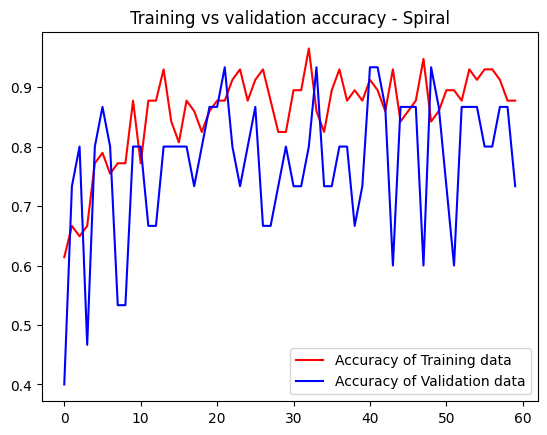

<Figure size 640x480 with 0 Axes>

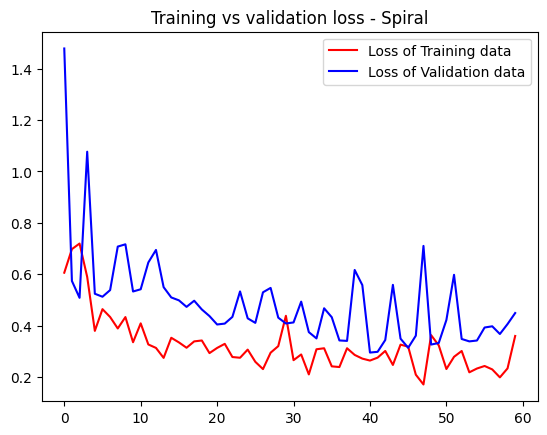

<Figure size 640x480 with 0 Axes>

In [25]:
get_acc3 = his3.history['accuracy']
value_acc3 = his3.history['val_accuracy']
get_loss3 = his3.history['loss']
validation_loss3 = his3.history['val_loss']

epochs3 = range(len(get_acc3))
plt.plot(epochs3, get_acc3, 'r', label='Accuracy of Training data')
plt.plot(epochs3, value_acc3, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy - Spiral')
plt.legend(loc=0)
plt.figure()
plt.show()

epochs3 = range(len(get_loss3))
plt.plot(epochs3, get_loss3, 'r', label='Loss of Training data')
plt.plot(epochs3, validation_loss3, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss - Spiral')
plt.legend(loc=0)
plt.figure()
plt.show()

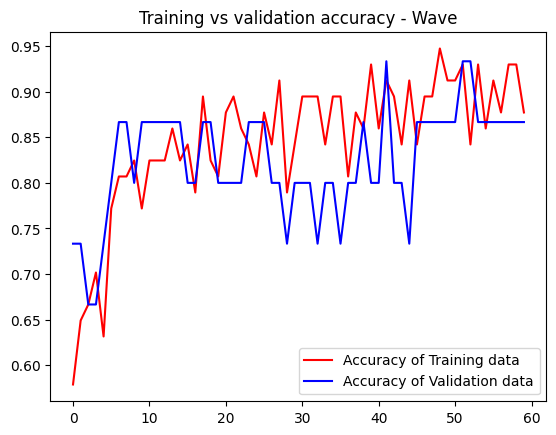

<Figure size 640x480 with 0 Axes>

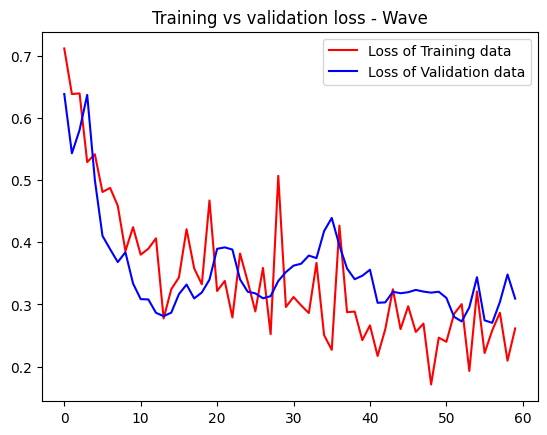

<Figure size 640x480 with 0 Axes>

In [26]:
get_acc4 = his4.history['accuracy']
value_acc4 = his4.history['val_accuracy']
get_loss4 = his4.history['loss']
validation_loss4 = his4.history['val_loss']

epochs4 = range(len(get_acc4))
plt.plot(epochs4, get_acc4, 'r', label='Accuracy of Training data')
plt.plot(epochs4, value_acc4, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy - Wave')
plt.legend(loc=0)
plt.figure()
plt.show()

epochs4 = range(len(get_loss4))
plt.plot(epochs4, get_loss4, 'r', label='Loss of Training data')
plt.plot(epochs4, validation_loss4, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss - Wave')
plt.legend(loc=0)
plt.figure()
plt.show()

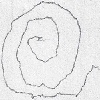

In [28]:
load_img("/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/spiral/testing/parkinson/V03PE07.png",target_size=(100,100))


In [29]:
image=load_img("/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/spiral/testing/parkinson/V03PE07.png",target_size=(100,100))

image=img_to_array(image)
image=image/255.0
prediction_image=np.array(image)
prediction_image=np.expand_dims(image, axis=0)

prediction=model3.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

1/1 [==============================] - 0s 177ms/step
Prediction is parkinson.


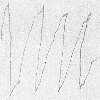

In [30]:
load_img("/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/wave/testing/parkinson/V03PO01.png",target_size=(100,100))

In [31]:
image2=load_img("/content/drive/MyDrive/PD_Thesis/PD-Dataset-1/PD-Dataset/wave/testing/parkinson/V03PO01.png",target_size=(100,100))

image2=img_to_array(image2)
image2=image2/255.0
prediction_image2=np.array(image2)
prediction_image2=np.expand_dims(image2, axis=0)

prediction2=model4.predict(prediction_image2)
value2=np.argmax(prediction2)
move_name2=mapper(value2)
print("Prediction is {}.".format(move_name2))


1/1 [==============================] - 5s 5s/step
Prediction is healthy.


In [32]:
print(test_sp.shape)
prediction_sp=model3.predict(test_sp)
print(prediction_sp.shape)

PRED_sp=[]
for item in prediction_sp:
    value_sp=np.argmax(item)
    PRED_sp+=[value_sp]

ANS_sp=tlabels_sp0
accuracy_sp=accuracy_score(ANS_sp,PRED_sp)
print(accuracy_sp)

(30, 100, 100, 3)
1/1 [==============================] - 1s 1s/step
(30, 2)
0.8333333333333334


In [34]:
print(test_wv.shape)
prediction_wv=model4.predict(test_wv)
print(prediction_wv.shape)

PRED_wv=[]
for item in prediction_wv:
    value_wv=np.argmax(item)
    PRED_wv+=[value_wv]

ANS_wv=tlabels_wv0
accuracy_wv=accuracy_score(ANS_wv,PRED_wv)
print(accuracy_wv)

(30, 100, 100, 3)
1/1 [==============================] - 2s 2s/step
(30, 2)
0.9
